# ติดตั้ง yfinance

In [1]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 640.0 kB/s eta 0:00:05
      --------------------------------------- 0.1/3.0 MB 1.1 MB/s eta 0:00:03
     --- ------------------------------------ 0.3/3.0 MB 2.3 MB/s eta 0:00:02
     ----- ---------------------------------- 0.5/3.0 MB 2.8 MB/s eta 0:00:01
     ------- -------------------------------- 0.6/3.0 MB 2.6 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/3.0 MB 3.4 MB/s eta 0:00:01
     ----------------- ---------------------- 1.4/3.0 MB 4.1 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 4.0 MB/s eta 0:00:01
     ---------------------- ----------------- 1.7/3.0 MB 4.0 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/3.0 MB 4.7 MB/s eta 0:00:01
     ------------------------------ --------- 2.3/3.0 MB 4.4 MB/s eta 0:00:01
     --------------------------------- ------ 2.6/3.0 MB 4.5 MB/s eta

In [2]:
import yfinance as yf

# ดึงข้อมูลหุ้น MAJOR ตั้งแต่ปี 2023 ถึง 2024
major_stock = yf.download("MAJOR.BK", start="2023-01-01", end="2024-12-31")

# แสดงตัวอย่างข้อมูล
print(major_stock.head())

# บันทึกข้อมูลเป็นไฟล์ CSV
major_stock.to_csv("major_stock_2023_2024.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker       MAJOR.BK   MAJOR.BK   MAJOR.BK   MAJOR.BK MAJOR.BK
Date                                                           
2023-01-03  17.337694  17.431921  17.149242  17.243467  2794100
2023-01-04  16.960791  17.337697  16.866564  17.337697  4394400
2023-01-05  16.772337  16.960791  16.678112  16.960791  4311400
2023-01-06  16.772337  16.960791  16.678112  16.772337  2615400
2023-01-09  16.960791  16.960791  16.772337  16.866564  1961000


In [3]:
major_stock.to_csv("major_stock_2023_2024.csv")

In [4]:
import os
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.VirtualBox',
 '.virtual_documents',
 '.vscode',
 '3D Objects',
 'anaconda3',
 'AppData',
 'Application Data',
 'battery-report.html',
 'Contacts',
 'Cookies',
 'covid19.ipynb',
 'Desktop',
 'Documents',
 'Downloads',
 'edb_pgagent_pg17.exe',
 'edb_pgjdbc.exe',
 'Favorites',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Major.ipynb',
 'major_stock_2023_2024.csv',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'Unt

In [6]:
import pandas as pd

# โหลดข้อมูลจาก CSV
data = pd.read_csv('major_stock_2023_2024.csv')

# ดูชื่อคอลัมน์ทั้งหมด
print(data.columns)

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [7]:
import pandas as pd

# โหลดข้อมูลจาก CSV
data = pd.read_csv('major_stock_2023_2024.csv')

# สมมุติว่าแถวแรกเป็นวันที่เริ่มต้น (เริ่มจากวันที่ 1 มกราคม 2023)
data['Date'] = pd.date_range(start='2023-01-01', periods=len(data), freq='B')  # 'B' คือวันทำการ

# ตั้งคอลัมน์ 'Date' เป็น Index
data.set_index('Date', inplace=True)

# แสดงตัวอย่างข้อมูล
print(data.head())

                 Price               Close                High  \
Date                                                             
2023-01-02      Ticker            MAJOR.BK            MAJOR.BK   
2023-01-03        Date                 NaN                 NaN   
2023-01-04  2023-01-03   17.33769416809082   17.43192112822991   
2023-01-05  2023-01-04  16.960790634155273  17.337696733246048   
2023-01-06  2023-01-05  16.772336959838867  16.960790911076188   

                           Low                Open    Volume  
Date                                                          
2023-01-02            MAJOR.BK            MAJOR.BK  MAJOR.BK  
2023-01-03                 NaN                 NaN       NaN  
2023-01-04   17.14924204504242   17.24346720795173   2794100  
2023-01-05  16.866563660075066  17.337696733246048   4394400  
2023-01-06  16.678111781450284  16.960790911076188   4311400  


In [17]:
# สร้างฟีเจอร์ Moving Average (MA) 7 วัน
data['MA7'] = data['Close'].rolling(window=7).mean()

# สร้างฟีเจอร์ Exponential Moving Average (EMA) 14 วัน
data['EMA14'] = data['Close'].ewm(span=14, adjust=False).mean()

# แสดงตัวอย่างข้อมูลที่มีฟีเจอร์ใหม่
print(data.tail())

                 Price  Close                High                 Low  \
Date                                                                    
2024-11-07  2024-12-24   14.9  14.899999618530273  14.300000190734863   
2024-11-08  2024-12-25   14.9                15.0  14.600000381469727   
2024-11-11  2024-12-26   14.7  14.899999618530273                14.5   
2024-11-12  2024-12-27   14.8  14.800000190734863                14.5   
2024-11-13  2024-12-30   14.7  14.800000190734863  14.399999618530273   

                          Open   Volume        MA7      EMA14  
Date                                                           
2024-11-07  14.399999618530273  2545600  14.685714  14.681149  
2024-11-08  14.899999618530273  2994300  14.714286  14.710329  
2024-11-11  14.800000190734863  1676100  14.714286  14.708952  
2024-11-12  14.699999809265137  1460300  14.714286  14.721091  
2024-11-13  14.600000381469727  1433000  14.700000  14.718279  


In [12]:
# ตรวจสอบประเภทข้อมูลของแต่ละคอลัมน์
print(data.dtypes)


Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [13]:
# แปลงคอลัมน์ Close ให้เป็นตัวเลข และจัดการค่าที่ผิดพลาด
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# ตรวจสอบค่าหลังจากแปลง
print(data[['Close']].head())


                Close
Date                 
2023-01-02        NaN
2023-01-03        NaN
2023-01-04  17.337694
2023-01-05  16.960791
2023-01-06  16.772337


In [15]:
# เติมค่า NaN ด้วยค่าเฉลี่ยของคอลัมน์ Close
data['Close'].fillna(data['Close'].mean(), inplace=True)


In [16]:
# คำนวณ MA 7 วัน
data['MA7'] = data['Close'].rolling(window=7).mean()

# คำนวณ EMA 14 วัน
data['EMA14'] = data['Close'].ewm(span=14, adjust=False).mean()

# ตรวจสอบค่าที่คำนวณแล้ว
print(data[['Close', 'MA7', 'EMA14']].tail())


            Close        MA7      EMA14
Date                                   
2024-11-07   14.9  14.685714  14.681149
2024-11-08   14.9  14.714286  14.710329
2024-11-11   14.7  14.714286  14.708952
2024-11-12   14.8  14.714286  14.721091
2024-11-13   14.7  14.700000  14.718279


In [18]:
# คำนวณ Daily Return (การเปลี่ยนแปลงของราคาหุ้นรายวัน)
data['Daily_Return'] = data['Close'].pct_change()

# คำนวณความผันผวน (Volatility) 7 วัน
data['Volatility'] = data['Daily_Return'].rolling(window=7).std()

# คำนวณ Momentum 7 วัน (วัดแนวโน้มของราคา)
data['Momentum'] = data['Close'] - data['Close'].shift(7)

# แสดงตัวอย่างข้อมูล
print(data.tail())


                 Price  Close                High                 Low  \
Date                                                                    
2024-11-07  2024-12-24   14.9  14.899999618530273  14.300000190734863   
2024-11-08  2024-12-25   14.9                15.0  14.600000381469727   
2024-11-11  2024-12-26   14.7  14.899999618530273                14.5   
2024-11-12  2024-12-27   14.8  14.800000190734863                14.5   
2024-11-13  2024-12-30   14.7  14.800000190734863  14.399999618530273   

                          Open   Volume        MA7      EMA14  Daily_Return  \
Date                                                                          
2024-11-07  14.399999618530273  2545600  14.685714  14.681149      0.027586   
2024-11-08  14.899999618530273  2994300  14.714286  14.710329      0.000000   
2024-11-11  14.800000190734863  1676100  14.714286  14.708952     -0.013423   
2024-11-12  14.699999809265137  1460300  14.714286  14.721091      0.006803   
2024-11-13  14

In [30]:
from sklearn.model_selection import train_test_split

# เลือกฟีเจอร์ที่ใช้สำหรับ Train
features = ['MA7', 'EMA14', 'Daily_Return', 'Volatility', 'Momentum']
X = data[features]
y = data['Close']  # ให้โมเดลพยากรณ์ราคาปิดของหุ้น

# แบ่งข้อมูลเป็นชุด Train (80%) และ Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"ขนาดของชุด Train: {X_train.shape}")
print(f"ขนาดของชุด Test: {X_test.shape}")


ขนาดของชุด Train: (390, 5)
ขนาดของชุด Test: (98, 5)


In [28]:
print(X.isnull().sum())  # ดูว่าคอลัมน์ไหนมี NaN บ้าง


MA7             0
EMA14           0
Daily_Return    0
Volatility      0
Momentum        0
dtype: int64


In [29]:
print(y.isnull().sum())  # เช็คว่ามี NaN ใน y หรือไม่


0


In [31]:
from sklearn.linear_model import LinearRegression

# สร้างโมเดล
model = LinearRegression()


In [35]:
# ฝึกโมเดลโดยใช้ข้อมูล Training
model.fit(X_train, y_train)


LinearRegression()

In [33]:
print("Missing values in X_train:")
print(X_train.isna().sum())

print("\nMissing values in X_test:")
print(X_test.isna().sum())


Missing values in X_train:
MA7             6
EMA14           0
Daily_Return    1
Volatility      7
Momentum        7
dtype: int64

Missing values in X_test:
MA7             0
EMA14           0
Daily_Return    0
Volatility      0
Momentum        0
dtype: int64


In [34]:
X_train = X_train.dropna()
X_test = X_test.dropna()

# ต้องลบค่า y_train และ y_test ให้ตรงกัน
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]


In [36]:
# ใช้โมเดลพยากรณ์ราคาหุ้นในชุดทดสอบ
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# คำนวณค่า MAE และ MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01


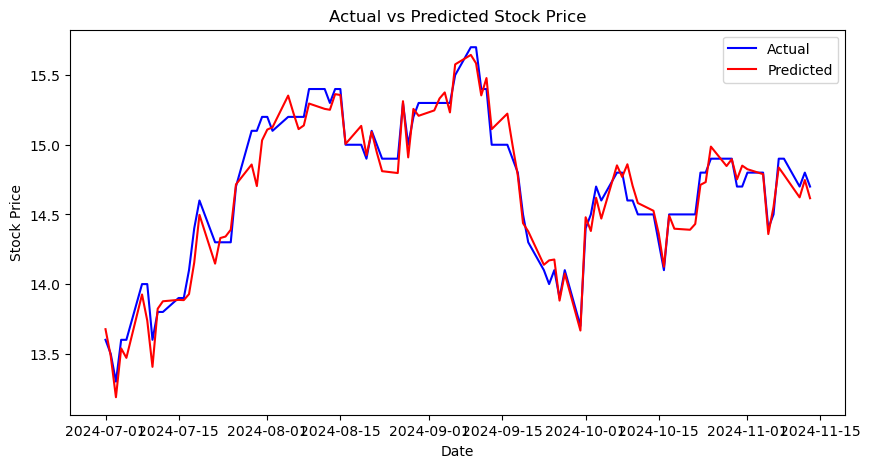

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted", color="red")
plt.legend()
plt.title("Actual vs Predicted Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


Random Forest MSE: 0.0217
Gradient Boosting MSE: 0.0186
XGBoost MSE: 0.0268


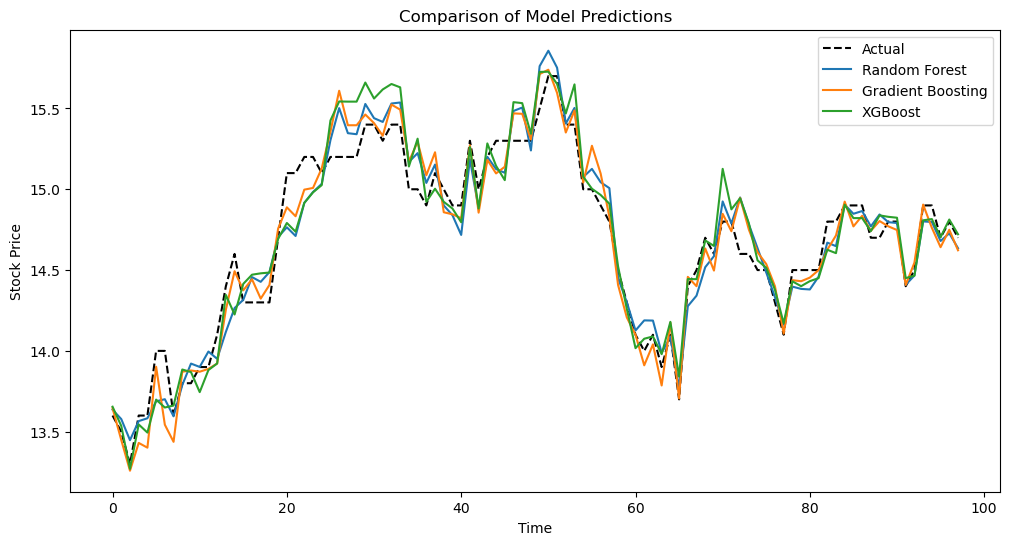

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# สร้างโมเดล
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

predictions = {}
mse_scores = {}

# Train และ Predict
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)
    mse_scores[name] = mean_squared_error(y_test, predictions[name])

# แสดงค่า MSE ของแต่ละโมเดล
for name, mse in mse_scores.items():
    print(f"{name} MSE: {mse:.4f}")

# Plot เปรียบเทียบผลลัพธ์
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black', linestyle='dashed')

for name, pred in predictions.items():
    plt.plot(pred, label=name)

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Comparison of Model Predictions")
plt.legend()
plt.show()
